<a href="https://colab.research.google.com/github/darshnkd/deep-learning-with-pytorch/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch workflow

Let's explore an exapmle PyTorch end-to-end workflow.

In [3]:
what_were_covering = {1:"data (preprocess and load)",
                      2:"build model",
                      3:"fitting the model to data",
                      4:"making predictions and evaluting a model(inference)",
                      5:"saving and loading model",
                      6:"putting it all"}

what_were_covering

{1: 'data (preprocess and load)',
 2: 'build model',
 3: 'fitting the model to data',
 4: 'making predictions and evaluting a model(inference)',
 5: 'saving and loading model',
 6: 'putting it all'}

In [4]:
import torch
from torch import nn # nn contain all of PyTorch's building blocks of nn graph
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.4.0+cu121'

## 1. Data (preparing and loading)

Data can be almost anything ... in machine learning

* Excel speadsheet
* Images of any kind
* Video (YouTube has lots of data)
* Audio like song or podcast
* DNA
* Text

Machine learning is a game of two parts :
1. Get data into numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some **known** data using the linear regression formula.

We'll use a linear regression formula to make a straight line with **known** parameters.

In [5]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X),len(y)

(50, 50)

###Spliting data into training and test set(one of the most important concept in machine learning in general)

In [7]:
#import matplotlib.pyplot as plt # Import the matplotlib library

# Create train / test set
train_set = int(0.8 * len(X))
X_train,y_train = X[:train_set],y[:train_set]
X_test ,y_test = X[train_set:], y[train_set:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

How might we visulize this data?

this is where the data explorer's motto comes in !

"Visualize, visualize , visualize !"

In [8]:
X_train , y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [9]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     Predictions = None):

  '''
  Plot training data, test data and compares predictions.
  '''

  plt.figure(figsize=(10,8))
  # plot training data in red
  plt.scatter(train_data,train_labels,c="r",s=4,label = "Training Data")
  # plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label = "Test Data")
  # plot prediction if they exist
  if Predictions is not None:
    plt.scatter(test_data,Predictions,c="b",s=4,label = "predictions")

  # show legend
  plt.legend(prop={"size":10})

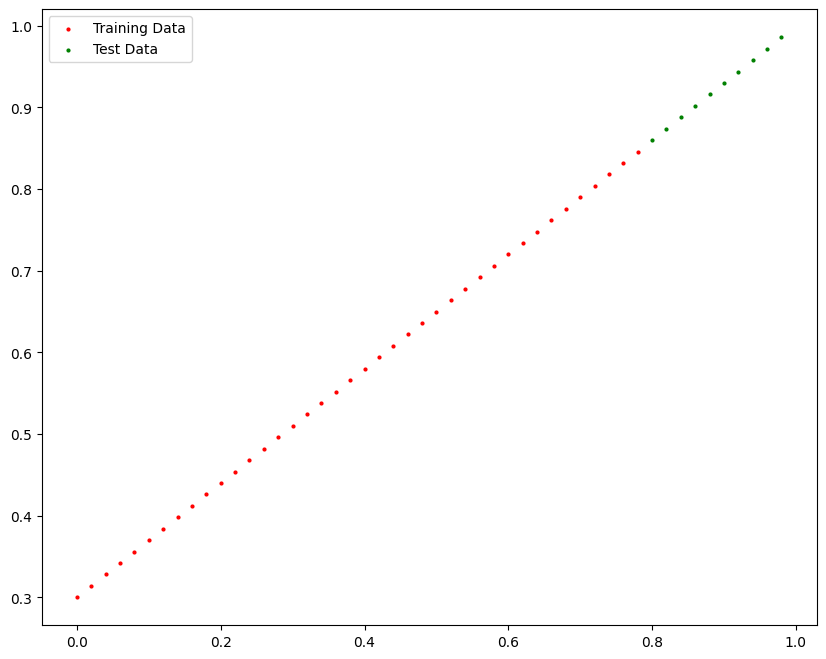

In [10]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

What our model does:
* start with random values (weights & bias)
* Look at training data and adjust the random values to better represent (or get closer to ) the ideal vlues(the weights & bias values we used to create the data)

How does it do so ?

Through two main algorithm:
1. Gradient Decent
2. Backpropagation

In [11]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in pytorch inherits from nn.model
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad=True,
                                           dtype=torch.float))

    self.bias = nn.Parameter(torch.rand(1,
                                        requires_grad=True, # Fixed the typo here
                                        dtype=torch.float))

# Forward method to define the computation in the model
  def forward(self,x:torch.Tensor) ->torch.Tensor: # "x" is the input data
    return self.weights * x + self.bias # linear regression formula

### 3. PyTorch model building essentials

* torch.nn - contain all of the building block of computational graph
* torch.nn.Parameter - what parameter should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* nn.Module - base class for all neural network Modules, if you subclass it, you should overwrite forward()
* torch.optim -contain various optimization algorithms (gradient descent etc)
* def forward() - All nn.Module subclasss require you to overwrite forward(), this method defines what happens in the forward computations

###Checking the contents of our PyTorch model

Now we've created model , let's see what's inside...

SO we can check our model parameters or what's inside our model using `.parameter()`.

In [12]:
# Create a random seed
torch.manual_seed(42)

# create an instance of the model (this is subclass of model)
model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [13]:
# List named parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [14]:
weight , bias

(0.7, 0.3)

### 4. Make predictions using `torch.inference_model()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`

When we pass data through our model, it's going to run it through the `forward()` method.

In [15]:
y_preds  = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]], grad_fn=<AddBackward0>)

In [16]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

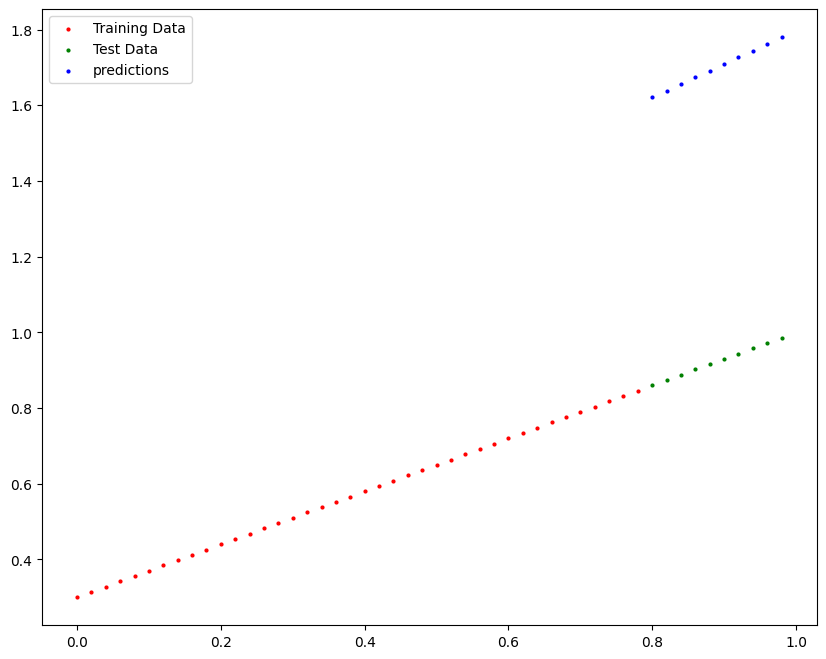

In [17]:
plot_predictions(Predictions=y_preds)

##  Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how wrong or poor is your models predictions are is to use a loss function.

* NOTE: Loss function may also called as cost function or criterion in different areas. for our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function**: A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer** : Takes into account the loss of model and adjusts the model's parameters (e.g weights & bias in our case) to improve the loss functions.

 * `params` - the model parameter you would like to optimize, for example `params=model_0.parameters()`

* `lr` - learning rate is the hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` result small changes, a large `lr` resuls in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop



In [18]:
# Setup a loss function
loss_fn = nn.L1Loss()

# setup optimizer (stochstic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) # lr is learning rate hyperparameter

###Building training (testing) loop in PyTorch

A copule of things we need in a training loop:
1. loop through the data
2. forward pass (this involve data moving through our model's `forward()` functions)-also called forward propogation.
3. Calculate the losss (compare forward pass predictions to ground truth labels)
4. Optimizer zero grad
5. Loss backward - move backward through the network to calculate the gradient of each of the parameter of our model with respect to the loss.(backpropogation)
6. Optimizer setup - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [19]:
# An epochs is one loop through the data....(this is hyperparameter because we set it)
epochs = 100

epoch_count = []
loss_value = []
test_loss_value = []

# 1. loop through the data
for epochs in range(epochs):
  #set the model to training mode-train mode in pytorch sets all parameter that require gradients to require gradients
  model_0.train()

  # 2. forward pass
  y_pred = model_0(X_train)

  # 3. calculate the loss
  loss = loss_fn(y_pred,y_train)

  # 4. Optimizer zero grad
  optimizer.zero_grad()

  # 5. perform backpropagtaion on the loss with respect to the parameter of model
  loss.backward()

  # 6. step the optmizer (perform gradient descent)
  optimizer.step() # byb default hoe the optmizer change will acculumate through the loop so.. we have to zero them above in step 4


  ### testing
  model_0.eval() # turns off different setting in the model not needed for evaluation/testing(dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & couple more things behind the scences
    # 1. do forward pass
    test_pred = model_0(X_test)

    # 2. claculate the loss
    test_loss = loss_fn(test_pred ,y_test)
  # print what's hapning'
  if epochs % 10 ==0:
    epoch_count.append(epochs)
    loss_value.append(loss)
    test_loss_value.append(test_loss)
    print(f"Epochs : {epochs}  | Loss : {loss} | Test Loss : {test_loss}")
  # print model state_dict()
print(model_0.state_dict())


Epochs : 0  | Loss : 0.6860889196395874 | Test Loss : 0.7637526988983154
Epochs : 10  | Loss : 0.5708791017532349 | Test Loss : 0.6290428042411804
Epochs : 20  | Loss : 0.45566922426223755 | Test Loss : 0.4943329691886902
Epochs : 30  | Loss : 0.34045934677124023 | Test Loss : 0.35962313413619995
Epochs : 40  | Loss : 0.2252494841814041 | Test Loss : 0.2249133139848709
Epochs : 50  | Loss : 0.1100396141409874 | Test Loss : 0.09020347893238068
Epochs : 60  | Loss : 0.009724985808134079 | Test Loss : 0.020998019725084305
Epochs : 70  | Loss : 0.006216754671186209 | Test Loss : 0.014099234715104103
Epochs : 80  | Loss : 0.002788322512060404 | Test Loss : 0.005826681852340698
Epochs : 90  | Loss : 0.007095950655639172 | Test Loss : 0.00754010071977973
OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])


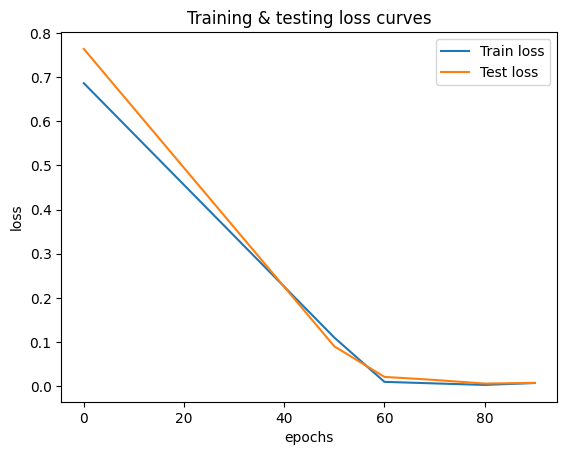

In [20]:
# plot the loss curves
plt.plot(epoch_count,torch.tensor(loss_value).numpy(), label="Train loss")
plt.plot(epoch_count,test_loss_value,label="Test loss")
plt.title("Training & testing loss curves")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

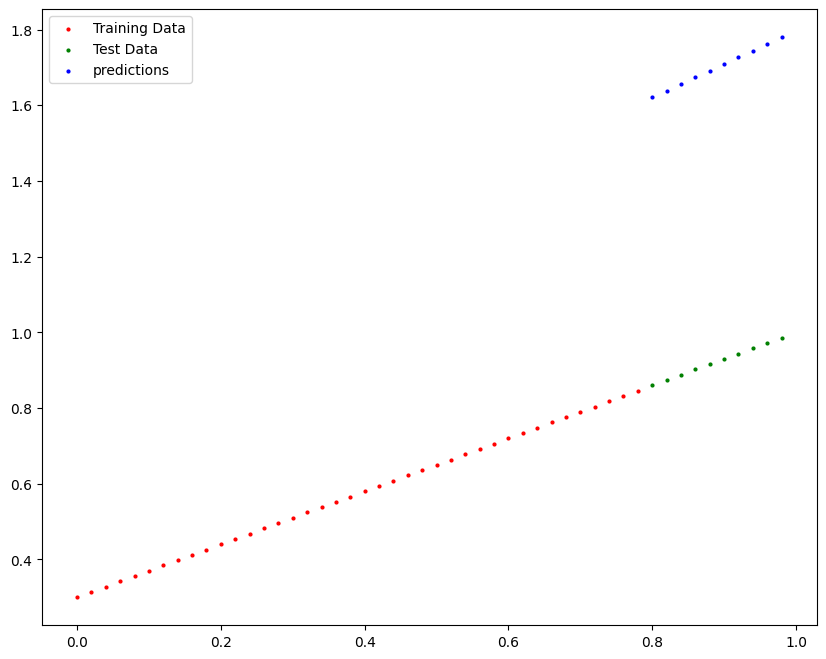

In [21]:
plot_predictions(Predictions=y_preds)

In [22]:
with torch.inference_mode():
  new_preds = model_0(X_test)

In [23]:
weight, bias

(0.7, 0.3)

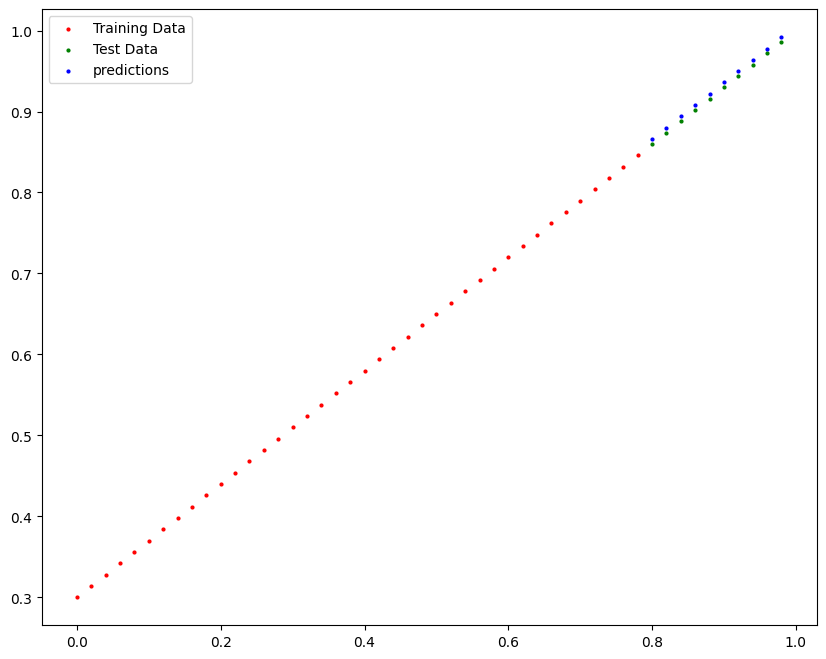

In [24]:
plot_predictions(Predictions=new_preds)

## 5. Saving a model in PyTorch

There are three main method you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows to save a PyTorch object in python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.module.load_state_dict()` - this allows to load a models saved state dictionary

In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [26]:
# saving our PyTorch model
from pathlib import Path

# 1, create nodel directory
model_path  = Path("models")
model_path.mkdir(parents=True,exist_ok=True)

# 2. create model save path
model_name = 'pytorch_workflow_model_0.pth'
model_save_path = model_path / model_name

# 3. save the model state dict
print(f"saving model to : {model_save_path}")
torch.save(obj=model_0.state_dict(),f=model_save_path)

saving model to : models/pytorch_workflow_model_0.pth


In [29]:
# you can save like this just in one line
torch.save(obj=model_0.state_dict(),f="/content/MODELS/model_0")
# by inserting the file path and model name

##Loading our PyTorch model

Since we save our model's `state_dict` rather than entire model, we'll create new instance of our model class and load the save model `state_dict` into that.

In [30]:
# Loading PyTorch model back
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f="/content/MODELS/model_0")) # this will update the new instance with updated parameter

<ipython-input-30-804a3757e890>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f="/content/MODELS/model_0")) # this will update the

<All keys matched successfully>

In [31]:
# check the state dict of loaded model
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [32]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [33]:
# let's try to make predictions on our loaded model
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)
loaded_model_preds


tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [34]:
# check the preds of original model
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [35]:
# Compare the loaded model preds with the original ,odel preds
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's do the all above steps in once

In [36]:
# import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

 # check version
torch.__version__

'2.4.0+cu121'

Create device-agnostic code.

This means if we got access to a GPU, our model will use it(potentially for faster computing)

If no GPU is avilable, the code will default to using the CPU.

In [37]:
# set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device : {device}")

Using device : cuda


### 6.1 Data

In [38]:
# prepare data using linear regression formula y=mx+b
weight = 0.24
bias = 0.10

# create a range value
satrt =0
end = 1
step = 0.03

# Create X and y (feature and labels)
X = torch.arange(satrt,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0300],
         [0.0600],
         [0.0900],
         [0.1200],
         [0.1500],
         [0.1800],
         [0.2100],
         [0.2400],
         [0.2700]]),
 tensor([[0.1000],
         [0.1072],
         [0.1144],
         [0.1216],
         [0.1288],
         [0.1360],
         [0.1432],
         [0.1504],
         [0.1576],
         [0.1648]]))

In [39]:
# split the data
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(27, 27, 7, 7)

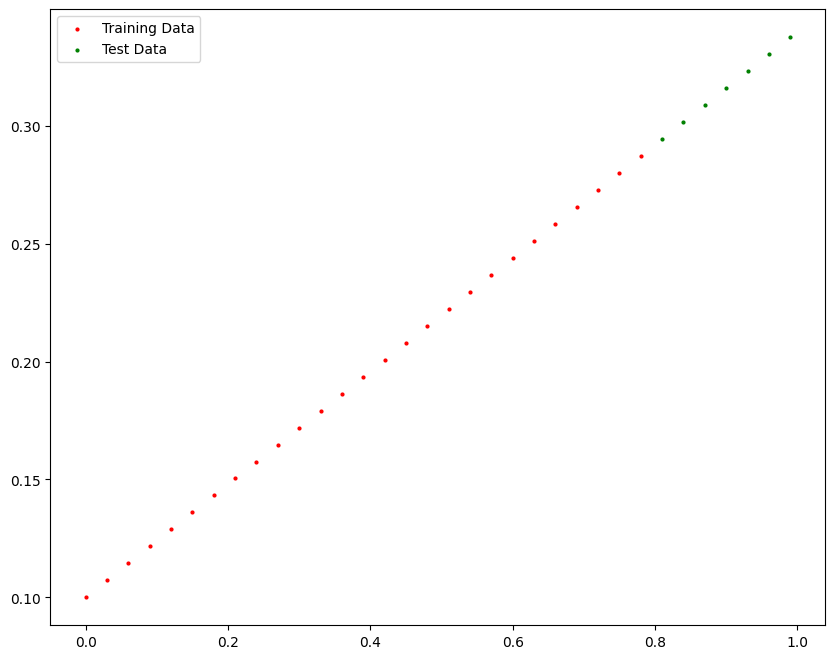

In [40]:
# plot the data
# Note: if you don't have plot_prediction finction loaded , this will error
plot_predictions(X_train,y_train,X_test,y_test)

### 6.2 Building a linear model

In [41]:
# create linear model by subclassing nn.module
class LinearRegressionModel2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameter / also called as probing layer , dens layer , linear transform
    self.Linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self,X:torch.Tensor) -> torch.Tensor:
    return self.Linear_layer(X)

# set the random seed
torch.manual_seed(42)

# create the instance of the class
model_1 = LinearRegressionModel2()
model_1 , model_1.state_dict()

(LinearRegressionModel2(
   (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('Linear_layer.weight', tensor([[0.7645]])),
              ('Linear_layer.bias', tensor([0.8300]))]))

In [42]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [43]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need :
* Loss function
* Optimizer
* Training loop
* Testing loop

In [44]:
# setup the loss function
loss_fn = nn.L1Loss() # same as the MAE

# setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [45]:
# Let's write training loop

# set random seed
torch.manual_seed(42)

epochs = 200

# put data on the target device (device agnostic code)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. forward pass
  y_pred = model_1(X_train)

  # 2. calculate the loss
  loss = loss_fn(y_pred,y_train)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform backpropagation
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred,y_test)

# print out what's happning
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}")



Epoch : 0 | Loss : 0.9345779418945312 | Test loss : 1.1885826587677002
Epoch : 10 | Loss : 0.8193680644035339 | Test loss : 1.0534827709197998
Epoch : 20 | Loss : 0.7041582465171814 | Test loss : 0.918383002281189
Epoch : 30 | Loss : 0.5889483094215393 | Test loss : 0.7832831144332886
Epoch : 40 | Loss : 0.4737384617328644 | Test loss : 0.648183286190033
Epoch : 50 | Loss : 0.3585285544395447 | Test loss : 0.5130834579467773
Epoch : 60 | Loss : 0.24331866204738617 | Test loss : 0.37798359990119934
Epoch : 70 | Loss : 0.1281086653470993 | Test loss : 0.2428836226463318
Epoch : 80 | Loss : 0.04970657452940941 | Test loss : 0.1353895664215088
Epoch : 90 | Loss : 0.037877507507801056 | Test loss : 0.09579331427812576
Epoch : 100 | Loss : 0.033922430127859116 | Test loss : 0.08059549331665039
Epoch : 110 | Loss : 0.030352145433425903 | Test loss : 0.07046136260032654
Epoch : 120 | Loss : 0.026843830943107605 | Test loss : 0.06236870214343071
Epoch : 130 | Loss : 0.023334437981247902 | Test 

In [46]:
weight, bias

(0.24, 0.1)

In [47]:
model_1.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.2420]], device='cuda:0')),
             ('Linear_layer.bias', tensor([0.0952], device='cuda:0'))])

### 6.4 Making predicetions and evaluating

In [48]:
# Turn model in to evaluation mode
model_1.eval()

# make predictions
with torch.inference_mode():
  model_1_y_preds = model_1(X_test)
model_1_y_preds

tensor([[0.2913],
        [0.2985],
        [0.3058],
        [0.3130],
        [0.3203],
        [0.3276],
        [0.3348]], device='cuda:0')

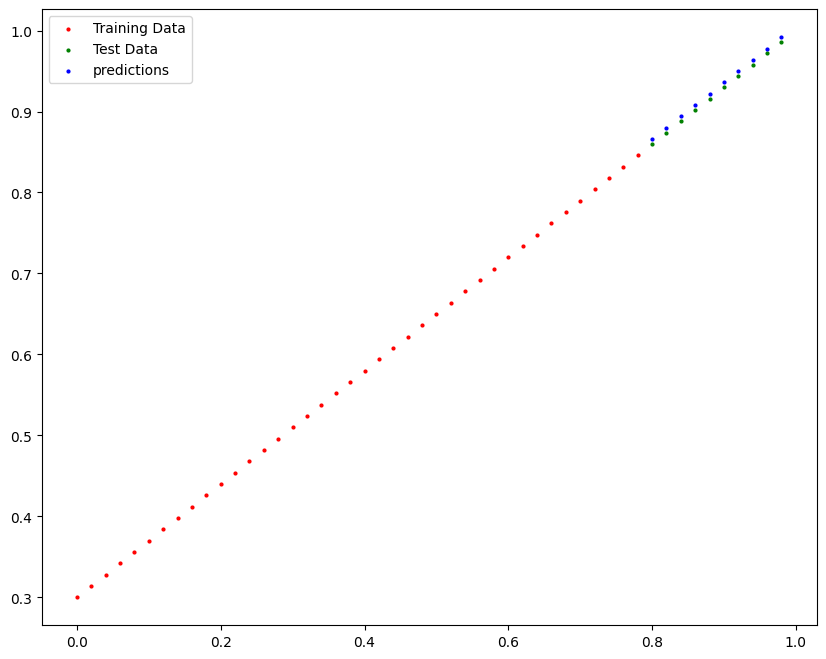

In [49]:
# check out our model predictions visually
plot_predictions(Predictions = y_preds.cpu())

### 6.5 Saving and loading model

In [50]:
# Saving model --> to MODELS
torch.save(obj=model_1.state_dict(),
           f="/content/MODELS/model_1")

In [51]:
# Loading model back
# create new instance of LinearRegression
loaded_model_1 = LinearRegressionModel2()

# load the saved model
loaded_model_1.load_state_dict(torch.load(f="/content/MODELS/model_1"))

# put the loaded model to device
loaded_model_1.to(device)

<ipython-input-51-de2299817693>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f="/content/MODELS/model_1"))


LinearRegressionModel2(
  (Linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [52]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [53]:
loaded_model_1.state_dict()

OrderedDict([('Linear_layer.weight', tensor([[0.2420]], device='cuda:0')),
             ('Linear_layer.bias', tensor([0.0952], device='cuda:0'))])

In [62]:
# Evalute the loaded model
loaded_model.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
model_1_y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')